<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complexity

**The effort required for a computer to run a program to completion given the size of input.**  

How does your program scale?

The most promising way to gauge the performance of the program is to count all the fundamental operations like additions, subtractions, multiplications, divisions, assignments, and function calls in the the program. These fundamental oprations are common in all the the computers so the measurement of efficiency can be replicated everywhere.

## Let's take an example function and calculate all the operations below-

_This is a special function that uses hardcoded values to return the total number of operations after the function executes to completion._

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def f(n):
  """
  f(n) = 2*n^2 + 4*n + 3

  n^2 terms -> 2*n^2 (total operations in nested for loops)
  n terms -> 4*n (total operations in for loop 2 and 3)
  constant terms -> 3 (constant time assignments)

  return count of all the terms
  """
  counter1 = 0  # constant time
  counter2 = 0  # constant time
  counter3 = 3  # constant time

  for i in range(n):
    for j in range(n):
      counter1 += 2  # assignment & addition n^2 times

  for k in range(n):
    counter2 += 1*2   # assignment & multiplication n times

  for l in range(n):
    counter2 += 1*2   # assignment & multiplication n times

  return [counter1, counter2, counter3]

In [177]:
n = 3
total_list = np.zeros([n, 4])

for i in range(0, n):
    term1, term2, term3 = f(i)
    total = term1 + term2 + term3
    print("Input n = {} --> Total = {}".format(i, total))
    total_list[i] = int(total), int(term1), int(term2), int(term3)

Input n = 0 --> Total = 3
Input n = 1 --> Total = 9
Input n = 2 --> Total = 19


In the example function above we have calculated the total number of operations across different $n$ values. Here it is visible that with increasing $n$ the number of operations increase steeply. But how does each part of the function contribute to the $Total$?

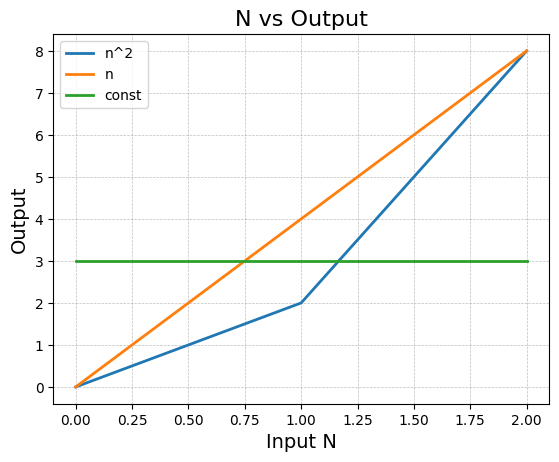

In [182]:
x = range(0, n)

plt.plot(x, total_list[:,1], linewidth=2, label='n^2')
plt.plot(x, total_list[:,2], linewidth=2, label='n')
plt.plot(x, total_list[:,3], linewidth=2, label='const')

plt.xlabel('Input N', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.title('N vs Output', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

It seems $n$ contributes the most to the total or does it?

Now lets take the function and check how much does each part of the function contribute to its output.

In [183]:
n = np.arange(0, 101, 10)
total_list = np.zeros([11, 4])

for i in n:
  term1, term2, term3 = f(i)
  total = term1 + term2 + term3
  if (i%10 == 0):
    print("Input n = {} --> Total = {} (n^2 = {:.0005}%, n = {:.0005}%, constant = {:.05}%)".format(i, total, (term1/total)*100, (term2/total)*100, (term3/total)*100))
  total_list[i//10,:] = total, term1, term2, term3

Input n = 0 --> Total = 3 (n^2 = 0.0%, n = 0.0%, constant = 100.0%)
Input n = 10 --> Total = 243 (n^2 = 82.305%, n = 16.461%, constant = 1.2346%)
Input n = 20 --> Total = 883 (n^2 = 90.6%, n = 9.06%, constant = 0.33975%)
Input n = 30 --> Total = 1923 (n^2 = 93.604%, n = 6.2402%, constant = 0.15601%)
Input n = 40 --> Total = 3363 (n^2 = 95.153%, n = 4.7577%, constant = 0.089206%)
Input n = 50 --> Total = 5203 (n^2 = 96.098%, n = 3.8439%, constant = 0.057659%)
Input n = 60 --> Total = 7443 (n^2 = 96.735%, n = 3.2245%, constant = 0.040306%)
Input n = 70 --> Total = 10083 (n^2 = 97.193%, n = 2.777%, constant = 0.029753%)
Input n = 80 --> Total = 13123 (n^2 = 97.539%, n = 2.4385%, constant = 0.022861%)
Input n = 90 --> Total = 16563 (n^2 = 97.808%, n = 2.1735%, constant = 0.018113%)
Input n = 100 --> Total = 20403 (n^2 = 98.025%, n = 1.9605%, constant = 0.014704%)


As $n$ increases, $n^2$ term contributes the most to the $total$ whereas the other terms are almost insignificant. Let's plot the graph now-

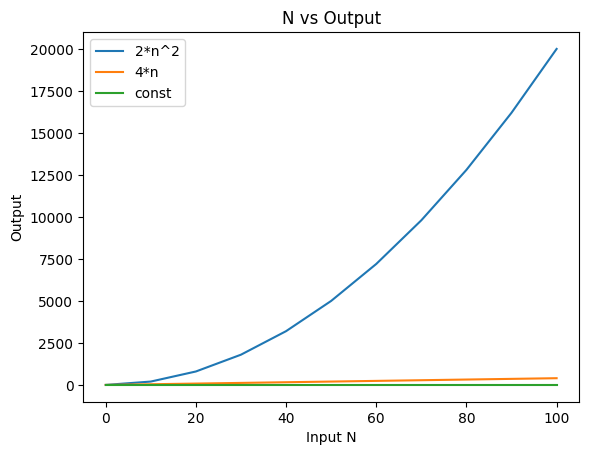

In [184]:
x = np.arange(0, 101, 10)

plt.plot(x, total_list[:,1], label='2*n^2')
plt.plot(x, total_list[:,2], label='4*n')
plt.plot(x, total_list[:,3], label='const')


plt.xlabel('Input N')
plt.ylabel('Output')
plt.title('N vs Output')
plt.legend()
plt.show()

## $O$ Big-O

We want to measure how hard it gets for a program to execute to completion as the input size grows. Big-O is used to track the growth of the number of basic operations with respect to the size of the input as the input size becomes very large. As $n$ gets larger the term that contributes the most to the number of total basic operations is dominant. So all the other terms are dropped and only the dominant term is included in Big-O notation.


**Formal definition of Big-O**

$f(n) = O(g(n))$ if for constant C and initial value $n_0$,  
$f(n) ≤ C*(g(n))$ for all $n > n_0$

In the example above we saw that total operation are given by $2*n^2 + 4*n + 3$.   
Given the Big-O definition $C = 4$ & $n_0 = 2$ we say $f(n)$ is $O(N^2)$.

Now is $f(n) = O(n^3)$ or $f(n) = O(n^4)$?

Yes, it is.  

$f(n)$  <  $n^3$  <  $n^4$  


But $f(n) \neq O(n)$

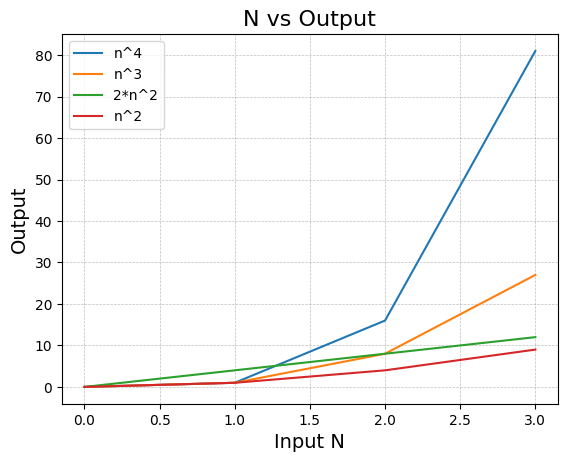

In [205]:
x = np.arange(0, 4, 1)
w = [i**2 for i in x]
y = [i**3 for i in x]
z = [i**4 for i in x]
fn = np.array([f(i) for i in x])

plt.plot(x, z, label='n^4')
plt.plot(x, y, label='n^3')
plt.plot(x, fn[:,1], label='2*n^2')
plt.plot(x, w, label='n^2')

plt.xlabel('Input N', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.title('N vs Output', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

## $\Omega$ Omega

There is another definition to calulate the upper bound on the $f(n)$.

**Formal definition of $Ω$ omega**

$f(n) = \Omega(g(n))$ if for constant C and initial value $n_0$,  
$f(n) ≥ C*(g(n))$ for all $n > n_0$

Is $f(n) = \Omega(n^2)$ ?

Yes.

$2*n^2 + 4*n + 3 \ge n^2$
when $C = 1$ and $n_0 = 0$

\\
Is $f(n) = \Omega(n^3)$ ?

No.

$2*n^2 + 4*n + 3 \le n^3$ for all $n \ge 4$

We saw both of these result in [this](#scrollTo=ef8N_LXccAny&line=5&uniqifier=1) graph above.

## $Θ$ Theta


$Θ$ bounds the $f(n)$.

**Formal definition of $Θ$ Theta**

$f(n) = \Theta(g(n))$ iff,  


1.   $f(n) = O(g(n))$
2.   $f(n) = \Omega(g(n))$

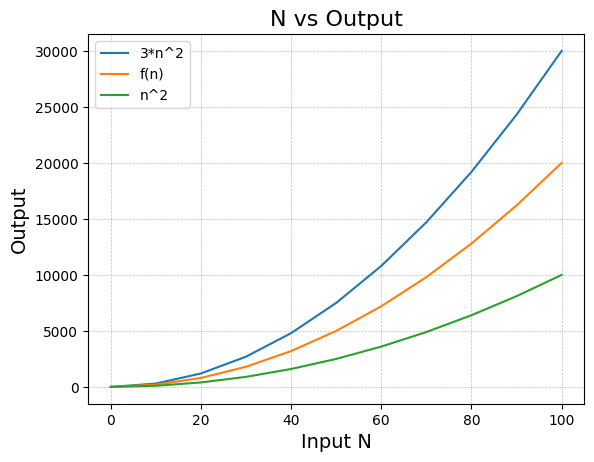

In [203]:
x = np.arange(0, 101, 10)
w = [i**2 for i in x]
y = [3*(i**2) for i in x]
fn = np.array([f(i) for i in x])

plt.plot(x, y, label='3*n^2')
plt.plot(x, fn[:,0], label='f(n)')
plt.plot(x, w, label='n^2')

plt.xlabel('Input N', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.title('N vs Output', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

$f(n) = \Theta(g(n))$ and this tells us about both the properties Big-O as well as Ω

## Why does complexity matter?

Different complexities require different time to complete the task.

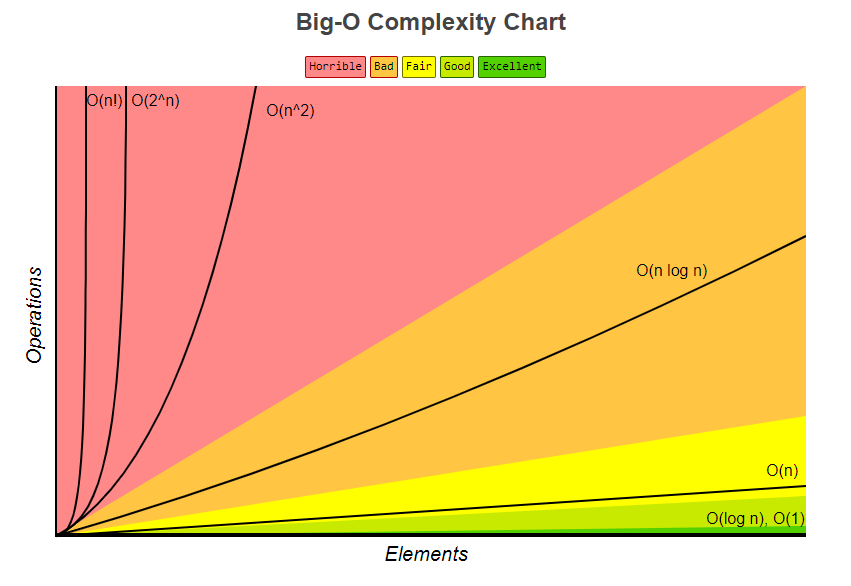

## Python %time

In [207]:
%time f(0)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.3 µs


[0, 0, 3]

In [208]:
%timeit f(0)

646 ns ± 215 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [215]:
%%timeit
n = 1000
counter1 = 0  # constant time
counter2 = 0  # constant time
counter3 = 3  # constant time

for i in range(n):
  for j in range(n):
    counter1 += 2  # assignment & addition n^2 times

for k in range(n):
  counter2 += 1*2   # assignment & multiplication n times

for l in range(n):
  counter2 += 1*2   # assignment & multiplication n times

51.3 ms ± 810 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [225]:
n = 3
counter1 = 0  # constant time
counter2 = 0  # constant time
counter3 = 3  # constant time

for i in range(n):
  for j in range(n):
    %time counter1 += 2  # assignment & addition n^2 times

for k in range(n):
  counter2 += 1*2   # assignment & multiplication n times

for l in range(n):
  counter2 += 1*2   # assignment & multiplication n times

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.96 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


## Python Profiler

**Timing the code as a whole line by line.**

In [236]:
%prun f(1000)



```
         4 function calls in 0.075 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.075    0.075    0.075    0.075 <ipython-input-176-2909cd61002a>:4(f)
        1    0.000    0.000    0.075    0.075 {built-in method builtins.exec}
        1    0.000    0.000    0.075    0.075 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.
```



**Timing the whole function line by line.**

In [233]:
pip install line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.9/661.9 kB 10.8 MB/s eta 0:00:00


In [234]:
%load_ext line_profiler

In [238]:
%lprun -f f f(100)



```

Timer unit: 1e-09 s

Total time: 0.0127911 s
File: <ipython-input-176-2909cd61002a>
Function: f at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     4                                           def f(n):
     5                                             """
     6                                             f(n) = 2*n^2 + 4*n + 3
     7                                           
     8                                             n^2 terms -> 2*n^2 (total operations in nested for loops)
     9                                             n terms -> 4*n (total operations in for loop 2 and 3)
    10                                             constant terms -> 3 (constant time assignments)
    11                                           
    12                                             return count of all the terms
    13                                             """
    14         1       2770.0   2770.0      0.0    counter1 = 0  # constant time
    15         1        353.0    353.0      0.0    counter2 = 0  # constant time
    16         1        269.0    269.0      0.0    counter3 = 3  # constant time
    17                                           
    18       100      29754.0    297.5      0.2    for i in range(n):
    19     10000    7953017.0    795.3     62.2      for j in range(n):
    20     10000    4702979.0    470.3     36.8        counter1 += 2  # assignment & addition n^2 times
    21                                           
    22       100      23985.0    239.8      0.2    for k in range(n):
    23       100      28284.0    282.8      0.2      counter2 += 1*2   # assignment & multiplication n times
    24                                           
    25       100      21083.0    210.8      0.2    for l in range(n):
    26       100      26844.0    268.4      0.2      counter2 += 1*2   # assignment & multiplication n times
    27                                           
    28         1       1780.0   1780.0      0.0    return [counter1, counter2, counter3]
```

